In [16]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

In [22]:
raw_data = np.genfromtxt('../dataset/x09.txt', skip_header=31)
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

In [23]:
xs = np.array(raw_data[:,2], dtype=np.float32)
ys = np.array(raw_data[:,3], dtype=np.float32)
zs = np.array(raw_data[:,4], dtype=np.float32)

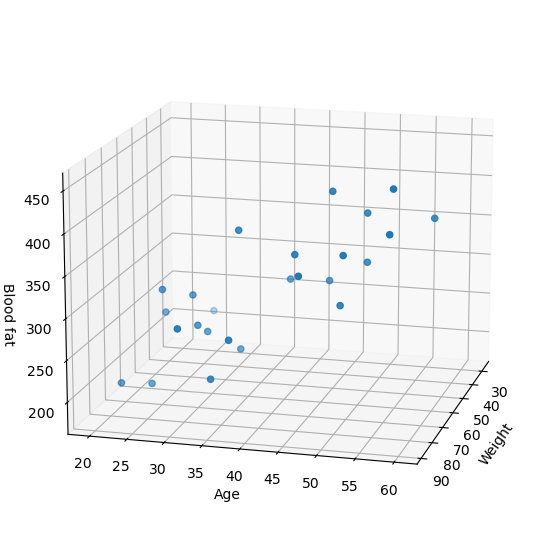

In [24]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()

In [25]:
x_data = np.array(raw_data[:,2:4], dtype=np.float32)
y_data = np.array(raw_data[:,4], dtype=np.float32)

y_data = y_data.reshape((25,1))

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,)),
])

model.compile(optimizer='rmsprop', loss='mse')

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
hist = model.fit(x_data, y_data, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 417ms/step - loss: 93972.6094
Epoch 2/5000
1/1 [==============================] - 0s 0s/step - loss: 93763.1797
Epoch 3/5000
1/1 [==============================] - 0s 8ms/step - loss: 93611.4922
Epoch 4/5000
1/1 [==============================] - 0s 6ms/step - loss: 93484.6172
Epoch 5/5000
1/1 [==============================] - 0s 4ms/step - loss: 93372.1016
Epoch 6/5000
1/1 [==============================] - 0s 35ms/step - loss: 93269.0625
Epoch 7/5000
1/1 [==============================] - 0s 5ms/step - loss: 93172.8125
Epoch 8/5000
1/1 [==============================] - 0s 4ms/step - loss: 93081.6562
Epoch 9/5000
1/1 [==============================] - 0s 0s/step - loss: 92994.4609
Epoch 10/5000
1/1 [==============================] - 0s 0s/step - loss: 92910.4375
Epoch 11/5000
1/1 [==============================] - 0s 2ms/step - loss: 92829.0078
Epoch 12/5000
1/1 [==============================] - 0s 0s/step - loss: 92749.7031
Ep

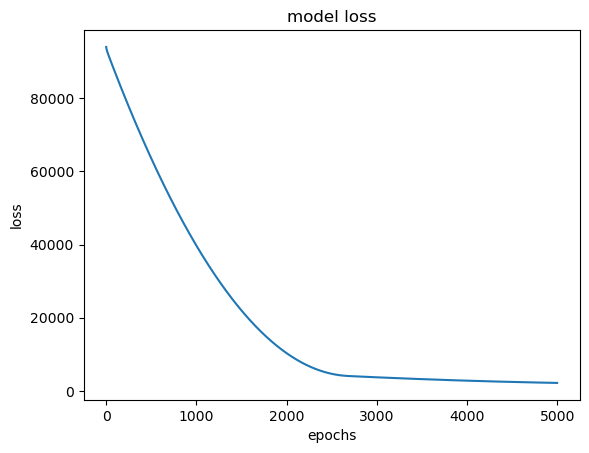

In [31]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [32]:
model.predict(np.array([100,44]).reshape(1,2))

1/1 [==============================] - 0s 100ms/step


array([[392.69418]], dtype=float32)

In [33]:
model.predict(np.array([60,25]).reshape(1,2))

1/1 [==============================] - 0s 17ms/step


array([[231.88795]], dtype=float32)

In [34]:
W_, b_ = model.get_weights()
print('Weight is : ', W_)
print('bias is : ', b_)

Weight is :  [[2.080978 ]
 [4.0824785]]
bias is :  [4.967321]


In [36]:
x = np.linspace(20, 100, 50).reshape(50,1)
y = np.linspace(10, 70, 50).reshape(50,1)

X = np.concatenate((x,y), axis=1)
Z = np.matmul(X, W_) + b_

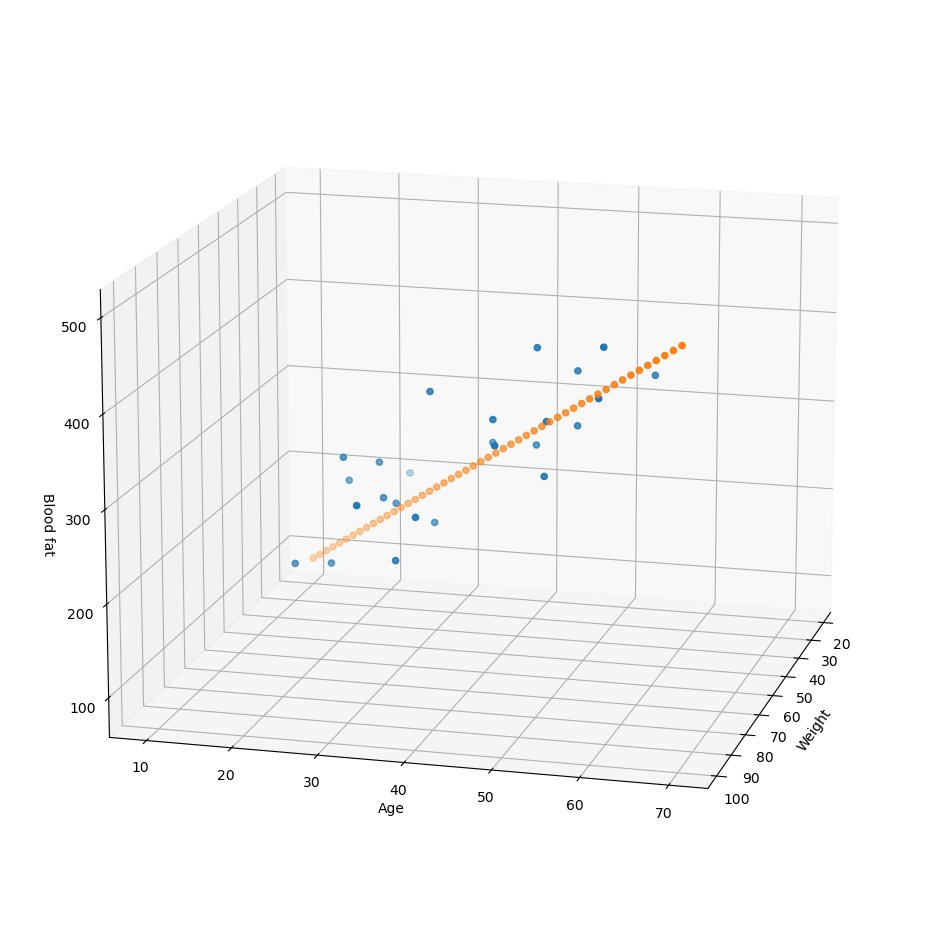

In [37]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.scatter(x, y, Z)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()

In [38]:
X = np.array([
    [0,0],
    [1,0],
    [0,1],
    [1,1]
])

y = np.array([
    [0], [1], [1], [0]
])

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [41]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
hist = model.fit(X, y, epochs=5000, batch_size=1)

Epoch 1/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2567
Epoch 2/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2567
Epoch 3/5000
4/4 [==============================] - 0s 414us/step - loss: 0.2566
Epoch 4/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2565
Epoch 5/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2565
Epoch 6/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2564
Epoch 7/5000
4/4 [==============================] - 0s 997us/step - loss: 0.2564
Epoch 8/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2563
Epoch 9/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2563
Epoch 10/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2562
Epoch 11/5000
4/4 [==============================] - 0s 376us/step - loss: 0.2562
Epoch 12/5000
4/4 [==============================] - 0s 0s/step - loss: 0.2560
Epoch 13/5000
4/4 [=========================

In [44]:
model.predict(X)

1/1 [==============================] - 0s 83ms/step


array([[0.46316132],
       [0.5048118 ],
       [0.5073452 ],
       [0.52803147]], dtype=float32)

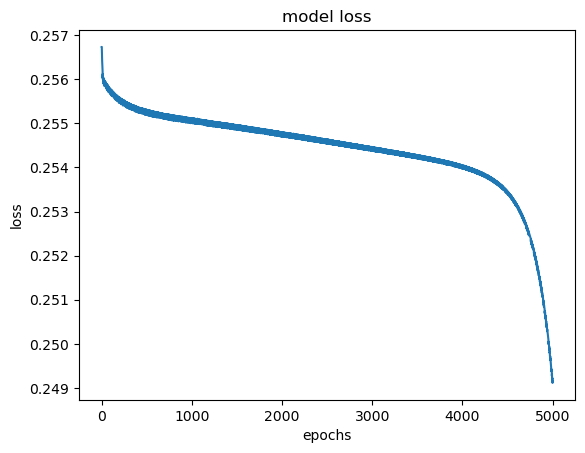

In [45]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [46]:
for w in model.weights:
    print('---')
    print(w)

---
<tf.Variable 'dense_2/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.99286395, -0.04597961],
       [-1.1235607 ,  0.6094356 ]], dtype=float32)>
---
<tf.Variable 'dense_2/bias:0' shape=(2,) dtype=float32, numpy=array([-0.5175481, -0.6823303], dtype=float32)>
---
<tf.Variable 'dense_3/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.8646404 ],
       [-0.03786964]], dtype=float32)>
---
<tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([0.1879712], dtype=float32)>


In [53]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
iris = load_iris()

X = iris.data
y = iris.target

In [54]:
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit(y.reshape(len(y), 1))

c:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [56]:
enc.categories_

[array([0, 1, 2])]

In [57]:
y_onehot = enc.transform(y.reshape(len(y), 1))
y_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot,
                                                    test_size=0.2,
                                                    random_state=13)

In [60]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(4,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

In [61]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                160       
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2371 (9.26 KB)
Trainable params: 2371 (9.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 6ms/step - loss: 1.0515 - accuracy: 0.6500
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9442 - accuracy: 0.6500
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8777 - accuracy: 0.6083
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8131 - accuracy: 0.6000
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7735 - accuracy: 0.6833
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7399 - accuracy: 0.6917
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7061 - accuracy: 0.6917
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6739 - accuracy: 0.6917
Epoch 9/100
4/4 [==============================] - 0s 0s/step - loss: 0.6464 - accuracy: 0.8083
Epoch 10/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6189 - accuracy: 0.8667
Epoch 11/100
4/4 [===========

In [63]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.1009 - accuracy: 1.0000 - 204ms/epoch - 204ms/step


[0.10090676695108414, 1.0]

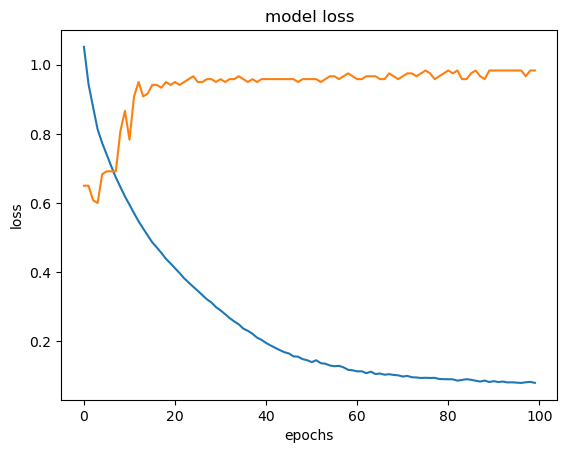

In [64]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()